In [4]:
%matplotlib inline

import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
def run(n=20, effect_size=.5, confound_size=.5, runs=10000):
    effect = np.random.randn(runs, n) + effect_size
    confound = np.random.randn(runs, n) + confound_size
    group1 = np.random.randn(runs, n)
    group2 = np.random.randn(runs, n)

    unconfounded_results = scipy.stats.ttest_1samp(group1 + effect, axis=1)[1]
    confounded_results = scipy.stats.ttest_1samp(group1 + effect + confound, axis=1)[1]
    stim_tests = scipy.stats.ttest_1samp(confound.T, 0)[1]

    sig_stimtests = np.where(stim_tests < .05)
    insig_stimtests = np.where(stim_tests > .05)
    assert(len(stim_tests) == runs)

    # Fake effect (not detected) 
    # stimuli not classified as confounded
    # significant effect with confounds
    nonrejected_insign_in_conf = np.intersect1d(insig_stimtests, np.where(confounded_results < .05)[0])
    no_alarm = unconfounded_results[np.intersect1d(nonrejected_insign_in_conf, 
                                                   np.where(unconfounded_results > .05)[0])]

    # Fake effect (not detected) 
    # stimuli classified as confounded
    # significant effect with confounds
    rejected_sign_in_conf = np.intersect1d(sig_stimtests, np.where(confounded_results < .05)[0])
    good_alarm = unconfounded_results[np.intersect1d(rejected_sign_in_conf, 
                                                     np.where(unconfounded_results > .05)[0])]

    # Real effect (falsely rejected) 
    # stimuli classified as confounded
    # significant effect without confounds
    false_rejection = unconfounded_results[np.intersect1d(sig_stimtests, 
                                                          np.where(unconfounded_results < .05)[0])]

    return no_alarm, good_alarm, false_rejection


In [11]:
def plot_hist(no_alarm, good_alarm, false_rejection, runs=100000, 
              effect_size=.5, n=20, confound_size=.3, ax=None, plty=False, pltx=False):
    ax.hist([no_alarm, good_alarm, false_rejection], 
             label=('Nondetected false results %: {}'.format(int(10*len(no_alarm)/runs*100)/10), 
                    'Detected false results %: {}'.format(int(10*len(good_alarm)/runs*100)/10), 
                    '(Falsely) rejected "real" results %: {}'.format(int(10*len(false_rejection)/runs*100)/10)),
             bins=np.arange(0, 1.05, .05))
    ax.legend()
    if pltx: ax.set_xlabel("p value of unconfounded data")
    else: ax.set_xticks([])
    if plty: ax.set_ylabel("Counts")
    ax.set_title("n: {}. Effect size: {}. Confound size: {}".format(n, effect_size, confound_size))


def run_stim(n=20, stims=40, effect_size=.5, confound_size=.3, runs=100000):
    effect = np.random.randn(runs, n) + effect_size
    confound = np.random.randn(runs, n) + confound_size
#    group1 = np.random.randn(runs, n)
#    group2 = np.random.randn(runs, n)

    unconfounded_results = scipy.stats.ttest_1samp(effect, 0, axis=1)[1]
    confounded_results = scipy.stats.ttest_1samp(effect + confound, 0, axis=1)[1]
    stim_tests = scipy.stats.ttest_1samp(confound.T, 0)[1]

    sig_stimtests = np.where(stim_tests < .05)
    insig_stimtests = np.where(stim_tests > .05)
    assert(len(stim_tests) == runs)

    # Fake effect (not detected) 
    # stimuli not classified as confounded
    # significant effect with confounds
    nonrejected_insign_in_conf = np.intersect1d(insig_stimtests, np.where(confounded_results < .05)[0])
    no_alarm = unconfounded_results[np.intersect1d(nonrejected_insign_in_conf, 
                                                   np.where(unconfounded_results > .05)[0])]

    # Fake effect (not detected) 
    # stimuli classified as confounded
    # significant effect with confounds
    rejected_sign_in_conf = np.intersect1d(sig_stimtests, np.where(confounded_results < .05)[0])
    good_alarm = unconfounded_results[np.intersect1d(rejected_sign_in_conf, 
                                                     np.where(unconfounded_results > .05)[0])]

    # Real effect (falsely rejected) 
    # stimuli classified as confounded
    # significant effect without confounds
    false_rejection = unconfounded_results[np.intersect1d(sig_stimtests, 
                                                          np.where(unconfounded_results < .05)[0])]

    return no_alarm, good_alarm, false_rejection

# n=20
stims=40
effect_size=.5
confound_size=.3
runs=100000

plot_hist(*run_stim(n=n, stims=stims, effect_size=effect_size, confound_size=confound_size, runs=runs), 
          n=n, effect_size=effect_size, confound_size=confound_size, runs=runs,
          ax=plt.gca(), pltx=True)

plt.gcf().savefig("/Users/jona/dropbox/manuscripts/statfail/statfail_simul.pdf")

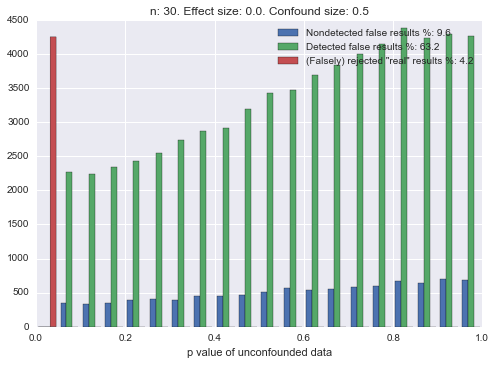

In [10]:
n=30
stims=40
effect_size=0.
confound_size=.5
runs=100000

plot_hist(*run_stim(n=n, stims=stims, effect_size=effect_size, confound_size=confound_size, runs=runs), 
          n=n, effect_size=effect_size, confound_size=confound_size, runs=runs,
          ax=plt.gca(), pltx=True)